In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display

data_path = '../Molecular_Properties'

In [3]:
files_names = !ls $data_path/*.csv
files_names

['../Molecular_Properties/dipole_moments.csv',
 '../Molecular_Properties/magnetic_shielding_tensors.csv',
 '../Molecular_Properties/mulliken_charges.csv',
 '../Molecular_Properties/potential_energy.csv',
 '../Molecular_Properties/sample_submission.csv',
 '../Molecular_Properties/scalar_coupling_contributions.csv',
 '../Molecular_Properties/structures.csv',
 '../Molecular_Properties/test.csv',
 '../Molecular_Properties/train.csv']

In [4]:
data_dict = {}

for name in files_names:
    data_dict[name.split('/')[-1][:-4]] = pd.read_csv(name)

In [5]:
df_complete = data_dict['train'].copy()
df_complete = df_complete.join(data_dict['potential_energy'].set_index('molecule_name'), on='molecule_name')
df_complete = df_complete.join(data_dict['dipole_moments'].set_index('molecule_name'), on='molecule_name', lsuffix='dipole_moments_')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['scalar_coupling_contributions'].set_index(['molecule_name', 'atom_index_0', 'atom_index_1']), on=['molecule_name', 'atom_index_0', 'atom_index_1'], rsuffix='_scc')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0_structure')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1_structure')

In [6]:
df= df_complete.drop(['id'], axis=1)
len(df)

4658147

In [7]:
#a bigger subsample for this model
df_subsample=  df.sample(frac=0.1, random_state=1)
len(df_subsample)

465815

In [8]:
#these features were chosen due to the results of lightgbm model from the SNS and LGB EDA notebook
features= df_subsample[['fc', 'pso', 'sd', 'dso', 'mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1',
                       'mulliken_charge', 'potential_energy', 'ZZ_atom1', 'Z']]

In [9]:
features

,fc,pso,sd,dso,mulliken_charge_atom1,YY,XX_atom1,XX,ZZ,YY_atom1,mulliken_charge,potential_energy,ZZ_atom1,Z
2557043,2.348940,-0.033082,-0.034241,0.092030,0.232601,180.3960,29.5177,181.4930,182.7930,33.5564,-0.508960,-435.3620,25.1699,1.5065
1571490,-9.521030,1.903460,0.374256,-2.072480,0.116264,30.6437,26.8083,28.6370,28.7841,26.9144,0.124500,-421.9332,33.7409,1.1443
3815279,2.822460,0.307475,-0.062896,-0.553075,0.114498,102.3440,28.5014,94.3560,120.7070,30.7883,0.052715,-459.0387,22.9905,2.3221
3327074,0.365051,0.194738,-0.024773,-0.268798,0.096038,97.0485,30.2074,104.8590,105.2960,23.2356,0.270692,-460.3333,25.4791,1.5971
842927,7.688050,0.437421,0.111036,-0.451560,0.111746,27.0696,35.8985,35.8979,29.9001,27.0690,0.111749,-418.1772,29.9001,-0.0005
2140407,3.255910,0.329974,-0.018175,-0.392163,0.084225,102.3000,31.1637,131.5510,73.7504,31.2623,0.409009,-384.7619,26.2865,-1.2719
3680350,6.403150,0.204172,0.008111,-0.383134,0.254727,-73.1443,27.3955,8.2437,68.7723,31.7620,0.163884,-437.9416,33.3706,1.5549
2138509,103.204000,-0.271135,0.326960,1.176050,0.094574,111.7740,27.5733,112.7430,107.9920,26.5807,-0.195095,-400.7982,28.6064,1.1448
764496,-14.941700,2.464970,0.364028,-2.744870,0.145777,28.1549,30.8524,30.7456,30.3039,27.3038,0.145833,-364.9921,31.0117,-0.0023
3520100,6.724470,0.175627,-0.091349,-0.411963,0.093734,103.4430,28.2487,-6.7723,93.6850,34.1253,-0.061302,-388.5033,26.3072,0.6673


In [10]:
target= df_subsample[['scalar_coupling_constant']]
target

,scalar_coupling_constant
2557043,2.373650
1571490,-9.315790
3815279,2.513960
3327074,0.266218
842927,7.784940
2140407,3.175540
3680350,6.232300
2138509,104.436000
764496,-14.857600
3520100,6.396780


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
feature_train, feature_test, target_train, target_test= train_test_split(features, target, test_size=0.1)

In [13]:
print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  419233
total feature testing features:  46582
total target training features:  419233
total target testing features:  46582


In [14]:
feature_train.shape

(419233, 14)

In [15]:
target_train.shape

(419233, 1)

In [16]:
import lightgbm

/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [17]:
#just to see if I missed any categorical. Don't need it
categorical_features = [c for c, col in enumerate(df_subsample.columns) if 'cat' in col]
categorical_features

[]

In [18]:
train_data = lightgbm.Dataset(feature_train, label=target_train, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(feature_test, label=target_test)

In [19]:
#basic parameter: same as before
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}


In [20]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's auc: 0.998412
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.994889
[3]	valid_0's auc: 0.99569
[4]	valid_0's auc: 0.998581
[5]	valid_0's auc: 0.998835
[6]	valid_0's auc: 0.998938
[7]	valid_0's auc: 0.999111
[8]	valid_0's auc: 0.998999
[9]	valid_0's auc: 0.998958
[10]	valid_0's auc: 0.998872
[11]	valid_0's auc: 0.998891
[12]	valid_0's auc: 0.998952
[13]	valid_0's auc: 0.99899
[14]	valid_0's auc: 0.998945
[15]	valid_0's auc: 0.999017
[16]	valid_0's auc: 0.998942
[17]	valid_0's auc: 0.999033
[18]	valid_0's auc: 0.998958
[19]	valid_0's auc: 0.998926
[20]	valid_0's auc: 0.998877
[21]	valid_0's auc: 0.998865
[22]	valid_0's auc: 0.998801
[23]	valid_0's auc: 0.998765
[24]	valid_0's auc: 0.998691
[25]	valid_0's auc: 0.998826
[26]	valid_0's auc: 0.99877
[27]	valid_0's auc: 0.998929
[28]	valid_0's auc: 0.99906
[29]	valid_0's auc: 0.999026
[30]	valid_0's auc: 0.999001
[31]	valid_0's auc: 0.999106
[32]	valid_0's auc: 0.999088
[33]	valid_0's auc: 0.

[279]	valid_0's auc: 0.999961
[280]	valid_0's auc: 0.999962
[281]	valid_0's auc: 0.999962
[282]	valid_0's auc: 0.999962
[283]	valid_0's auc: 0.999962
[284]	valid_0's auc: 0.999963
[285]	valid_0's auc: 0.999963
[286]	valid_0's auc: 0.999963
[287]	valid_0's auc: 0.999963
[288]	valid_0's auc: 0.999964
[289]	valid_0's auc: 0.999964
[290]	valid_0's auc: 0.999964
[291]	valid_0's auc: 0.999965
[292]	valid_0's auc: 0.999965
[293]	valid_0's auc: 0.999965
[294]	valid_0's auc: 0.999965
[295]	valid_0's auc: 0.999965
[296]	valid_0's auc: 0.999966
[297]	valid_0's auc: 0.999966
[298]	valid_0's auc: 0.999966
[299]	valid_0's auc: 0.999966
[300]	valid_0's auc: 0.999966
[301]	valid_0's auc: 0.999966
[302]	valid_0's auc: 0.999966
[303]	valid_0's auc: 0.999967
[304]	valid_0's auc: 0.999967
[305]	valid_0's auc: 0.999967
[306]	valid_0's auc: 0.999967
[307]	valid_0's auc: 0.999967
[308]	valid_0's auc: 0.999967
[309]	valid_0's auc: 0.999968
[310]	valid_0's auc: 0.999968
[311]	valid_0's auc: 0.999968
[312]	vali

[563]	valid_0's auc: 0.999979
[564]	valid_0's auc: 0.999979
[565]	valid_0's auc: 0.999979
[566]	valid_0's auc: 0.999979
[567]	valid_0's auc: 0.999979
[568]	valid_0's auc: 0.999978
[569]	valid_0's auc: 0.999978
[570]	valid_0's auc: 0.999978
[571]	valid_0's auc: 0.999978
[572]	valid_0's auc: 0.999978
[573]	valid_0's auc: 0.999978
[574]	valid_0's auc: 0.999978
[575]	valid_0's auc: 0.999978
[576]	valid_0's auc: 0.999978
[577]	valid_0's auc: 0.999978
[578]	valid_0's auc: 0.999978
[579]	valid_0's auc: 0.999978
[580]	valid_0's auc: 0.999978
[581]	valid_0's auc: 0.999978
[582]	valid_0's auc: 0.999978
[583]	valid_0's auc: 0.999978
[584]	valid_0's auc: 0.999978
[585]	valid_0's auc: 0.999978
[586]	valid_0's auc: 0.999978
[587]	valid_0's auc: 0.999978
[588]	valid_0's auc: 0.999978
[589]	valid_0's auc: 0.999978
[590]	valid_0's auc: 0.999978
[591]	valid_0's auc: 0.999978
[592]	valid_0's auc: 0.999978
[593]	valid_0's auc: 0.999978
[594]	valid_0's auc: 0.999978
[595]	valid_0's auc: 0.999978
[596]	vali

[843]	valid_0's auc: 0.999981
[844]	valid_0's auc: 0.999981
[845]	valid_0's auc: 0.999981
[846]	valid_0's auc: 0.999981
[847]	valid_0's auc: 0.999981
[848]	valid_0's auc: 0.999981
[849]	valid_0's auc: 0.999981
[850]	valid_0's auc: 0.999981
[851]	valid_0's auc: 0.999981
[852]	valid_0's auc: 0.999981
[853]	valid_0's auc: 0.999981
[854]	valid_0's auc: 0.999981
[855]	valid_0's auc: 0.999981
[856]	valid_0's auc: 0.999981
[857]	valid_0's auc: 0.999981
[858]	valid_0's auc: 0.999981
[859]	valid_0's auc: 0.999981
[860]	valid_0's auc: 0.999981
[861]	valid_0's auc: 0.999981
[862]	valid_0's auc: 0.999981
[863]	valid_0's auc: 0.999981
[864]	valid_0's auc: 0.999981
[865]	valid_0's auc: 0.999981
[866]	valid_0's auc: 0.999981
[867]	valid_0's auc: 0.999981
[868]	valid_0's auc: 0.999981
[869]	valid_0's auc: 0.999981
[870]	valid_0's auc: 0.999981
[871]	valid_0's auc: 0.999981
[872]	valid_0's auc: 0.999981
[873]	valid_0's auc: 0.999981
[874]	valid_0's auc: 0.999981
[875]	valid_0's auc: 0.999981
[876]	vali

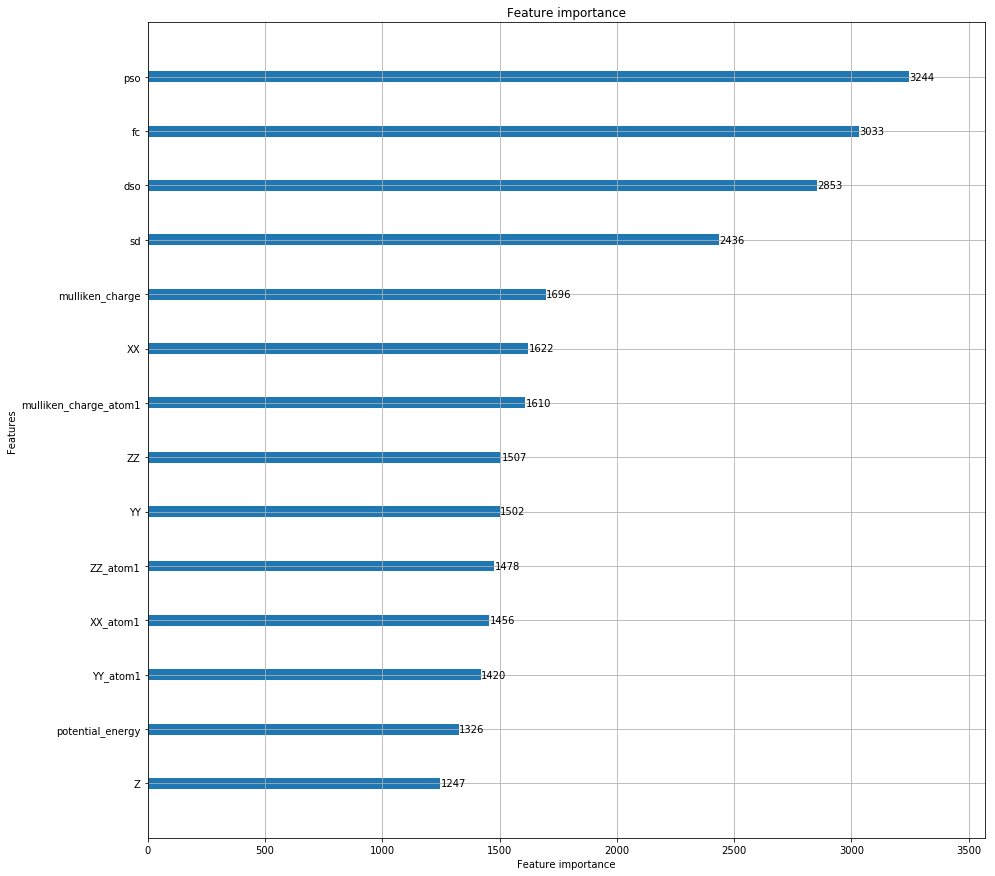

In [21]:
#Wanted to visualize the weight difference between each features. heavy imbalance between top 4 and the rest
ax = lightgbm.plot_importance(model, max_num_features=40, figsize=(15,15))
plt.show()

Creation of OLS

In [22]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
import seaborn as sns

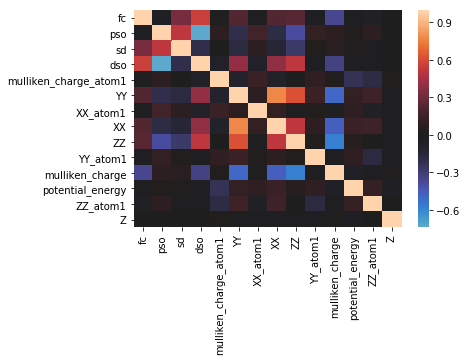

In [25]:
sns.heatmap(features.corr(), center=0);

In [26]:
X= feature_train
y= target_train
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   1.000
Model:                                  OLS   Adj. R-squared (uncentered):              1.000
Method:                       Least Squares   F-statistic:                          6.672e+15
Date:                      Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                              13:02:02   Log-Likelihood:                      3.3533e+06
No. Observations:                    419233   AIC:                                 -6.707e+06
Df Residuals:                        419219   BIC:                                 -6.706e+06
Df Model:                                14                                                  
Covariance Type:                  nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fc                        1.0000   6.17e-09   1.62e+08      0.000       1.000       1.000
pso                       1.0000   3.72e-07   2.69e+06      0.000       1.000       1.000
sd                        1.0000   1.22e-06   8.22e+05      0.000       1.000       1.000
dso                       1.0000   3.46e-07   2.89e+06      0.000       1.000       1.000
mulliken_charge_atom1  1.856e-06      3e-06      0.619      0.536   -4.02e-06    7.74e-06
YY                     4.065e-09   3.07e-09      1.326      0.185   -1.94e-09    1.01e-08
XX_atom1               2.513e-08   3.64e-08      0.690      0.490   -4.63e-08    9.65e-08
XX                     -3.89e-09    2.6e-09     -1.496      0.135   -8.98e-09     1.2e-09
ZZ                    -4.795e-09   3.24e-09     -1.481      0.139   -1.11e-08    1.55e-09
YY_atom1               3.152e-08   3.33e-08      0.947      0.343   -3.37e-08    9.67e-08
mulliken_charge       -1.002e-06   6.97e-07     -1.438      0.150   -2.37e-06    3.63e-07
potential_energy      -4.205e-10   2.79e-09     -0.151      0.880   -5.89e-09    5.05e-09
ZZ_atom1              -4.888e-08   2.97e-08     -1.645      0.100   -1.07e-07    9.35e-09
Z                     -1.996e-07   1.24e-07     -1.612      0.107   -4.42e-07    4.31e-08
==============================================================================
Omnibus:                   140837.121   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48587141.781
Skew:                          -0.070   Prob(JB):                         0.00
Kurtosis:                      55.740   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It seems that only fc, pso, sd and dso play significant role. Let's isolate them

In [27]:
X= feature_train[['fc', 'pso', 'sd', 'dso']]
y= target_train
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   1.000
Model:                                  OLS   Adj. R-squared (uncentered):              1.000
Method:                       Least Squares   F-statistic:                          2.335e+16
Date:                      Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                              13:04:21   Log-Likelihood:                      3.3533e+06
No. Observations:                    419233   AIC:                                 -6.707e+06
Df Residuals:                        419229   BIC:                                 -6.707e+06
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fc             1.0000   5.61e-09   1.78e+08      0.000       1.000       1.000
pso            1.0000   3.49e-07   2.86e+06      0.000       1.000       1.000
sd             1.0000   1.16e-06   8.65e+05      0.000       1.000       1.000
dso            1.0000   3.08e-07   3.25e+06      0.000       1.000       1.000
==============================================================================
Omnibus:                   140895.558   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48594993.003
Skew:                          -0.076   Prob(JB):                         0.00
Kurtosis:                      55.744   Cond. No.                         350.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's try with the other variables

In [28]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
y= target_train
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   0.290
Model:                                  OLS   Adj. R-squared (uncentered):              0.290
Method:                       Least Squares   F-statistic:                          1.715e+04
Date:                      Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                              13:06:42   Log-Likelihood:                     -2.0520e+06
No. Observations:                    419233   AIC:                                  4.104e+06
Df Residuals:                        419223   BIC:                                  4.104e+06
Df Model:                                10                                                  
Covariance Type:                  nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1   -22.4871      1.184    -18.987      0.000     -24.808     -20.166
YY                        0.0132      0.001     10.847      0.000       0.011       0.016
XX_atom1                 -0.0141      0.014     -0.985      0.325      -0.042       0.014
XX                        0.0313      0.001     30.644      0.000       0.029       0.033
ZZ                        0.0110      0.001      9.339      0.000       0.009       0.013
YY_atom1                 -0.2773      0.013    -21.093      0.000      -0.303      -0.252
mulliken_charge         -45.3623      0.263   -172.649      0.000     -45.877     -44.847
potential_energy         -0.0814      0.001    -75.187      0.000      -0.084      -0.079
ZZ_atom1                 -0.4820      0.012    -41.171      0.000      -0.505      -0.459
Z                         0.1816      0.049      3.690      0.000       0.085       0.278
==============================================================================
Omnibus:                   128278.254   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           329489.547
Skew:                           1.693   Prob(JB):                         0.00
Kurtosis:                       5.721   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In here, muliken_charge_atom1, YY, XX, ZZ, YY_atom1, muliken_charge, potential_energy, zz_atom1, and z play significant role.
Although majority are inverse relationships

In [34]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['fc']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     fc   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.290
Method:                 Least Squares   F-statistic:                          1.710e+04
Date:                Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                        13:10:57   Log-Likelihood:                     -2.0458e+06
No. Observations:              419233   AIC:                                  4.092e+06
Df Residuals:                  419223   BIC:                                  4.092e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1   -22.4703      1.167    -19.253      0.000     -24.758     -20.183
YY                        0.0123      0.001     10.266      0.000       0.010       0.015
XX_atom1                 -0.0191      0.014     -1.353      0.176      -0.047       0.009
XX                        0.0302      0.001     29.965      0.000       0.028       0.032
ZZ                        0.0116      0.001      9.979      0.000       0.009       0.014
YY_atom1                 -0.2783      0.013    -21.485      0.000      -0.304      -0.253
mulliken_charge         -44.6067      0.259   -172.285      0.000     -45.114     -44.099
potential_energy         -0.0816      0.001    -76.512      0.000      -0.084      -0.080
ZZ_atom1                 -0.4806      0.012    -41.660      0.000      -0.503      -0.458
Z                         0.1776      0.049      3.661      0.000       0.082       0.273
==============================================================================
Omnibus:                   130243.352   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342308.544
Skew:                           1.706   Prob(JB):                         0.00
Kurtosis:                       5.820   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['sd']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     sd   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.333
Method:                 Least Squares   F-statistic:                          2.096e+04
Date:                Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                        13:11:12   Log-Likelihood:                      2.5589e+05
No. Observations:              419233   AIC:                                 -5.118e+05
Df Residuals:                  419223   BIC:                                 -5.116e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1    -0.0698      0.005    -14.497      0.000      -0.079      -0.060
YY                    -5.537e-05   4.93e-06    -11.222      0.000    -6.5e-05   -4.57e-05
XX_atom1                  0.0040   5.83e-05     69.089      0.000       0.004       0.004
XX                    -5.426e-05   4.16e-06    -13.050      0.000   -6.24e-05   -4.61e-05
ZZ                       -0.0008    4.8e-06   -162.294      0.000      -0.001      -0.001
YY_atom1                  0.0018   5.35e-05     33.698      0.000       0.002       0.002
mulliken_charge          -0.0873      0.001    -81.707      0.000      -0.089      -0.085
potential_energy      -1.221e-05    4.4e-06     -2.773      0.006   -2.08e-05   -3.58e-06
ZZ_atom1                  0.0003   4.76e-05      6.140      0.000       0.000       0.000
Z                         0.0003      0.000      1.635      0.102   -6.51e-05       0.001
==============================================================================
Omnibus:                   120695.346   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           602201.812
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                       8.253   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['pso']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pso   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.383
Method:                 Least Squares   F-statistic:                          2.608e+04
Date:                Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                        13:11:23   Log-Likelihood:                     -4.1649e+05
No. Observations:              419233   AIC:                                  8.330e+05
Df Residuals:                  419223   BIC:                                  8.331e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1     1.4506      0.024     60.577      0.000       1.404       1.497
YY                        0.0001   2.45e-05      6.095      0.000       0.000       0.000
XX_atom1                  0.0244      0.000     84.304      0.000       0.024       0.025
XX                       -0.0008   2.07e-05    -36.471      0.000      -0.001      -0.001
ZZ                       -0.0062   2.39e-05   -259.754      0.000      -0.006      -0.006
YY_atom1                  0.0180      0.000     67.698      0.000       0.017       0.019
mulliken_charge          -0.6521      0.005   -122.756      0.000      -0.663      -0.642
potential_energy          0.0020   2.19e-05     92.419      0.000       0.002       0.002
ZZ_atom1                  0.0175      0.000     74.003      0.000       0.017       0.018
Z                        -0.0035      0.001     -3.475      0.001      -0.005      -0.002
==============================================================================
Omnibus:                   131266.337   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           951784.348
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                       9.896   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['dso']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dso   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                          2.323e+04
Date:                Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                        13:11:33   Log-Likelihood:                     -4.8507e+05
No. Observations:              419233   AIC:                                  9.702e+05
Df Residuals:                  419223   BIC:                                  9.703e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1    -1.3975      0.028    -49.555      0.000      -1.453      -1.342
YY                        0.0008   2.89e-05     27.416      0.000       0.001       0.001
XX_atom1                 -0.0235      0.000    -68.746      0.000      -0.024      -0.023
XX                        0.0019   2.43e-05     80.055      0.000       0.002       0.002
ZZ                        0.0064   2.81e-05    227.501      0.000       0.006       0.006
YY_atom1                 -0.0188      0.000    -59.947      0.000      -0.019      -0.018
mulliken_charge          -0.0162      0.006     -2.591      0.010      -0.028      -0.004
potential_energy         -0.0018   2.58e-05    -69.168      0.000      -0.002      -0.002
ZZ_atom1                 -0.0192      0.000    -68.837      0.000      -0.020      -0.019
Z                         0.0072      0.001      6.138      0.000       0.005       0.009
==============================================================================
Omnibus:                    31445.051   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59656.982
Skew:                          -0.533   Prob(JB):                         0.00
Kurtosis:                       4.510   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on all above observation, only fc, dso, pso and sd are key players. They have higher sample so there may be a need to normalize the data. But that should not be the case given the dataset itself